In [1]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa
import numpy as np


In [2]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [3]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [4]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [5]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [6]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
    return array


In [7]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [8]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

In [9]:
def runSimulation(experts,candidates,flag):
    experts = experts
    timeList = []
    candidates = candidates
    totalTime = 0
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i])
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  t1 + (t2 / experts) + t3
            timeList.append(totalTime)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates)
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2 / experts[i]) + t3
            timeList.append(totalTime)
    return (timeList)

In [10]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag):
    timeMatrix = []
    for i in range(0,4):
        timeList= runSimulation(experts, candidates,flag)
        timeMatrix.append(timeList)
    # print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    # print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("number of experts " + str(experts) )
        plt.xlabel("number Of Candidates")
        plt.ylabel("Average Execution Time")   
        plt.bar(candidates, columns_average)
        plt.show()
        print(columns_average)
    else :
        plt.title("number of candidates " + str(candidates))
        plt.xlabel("number Of Experts")
        plt.ylabel("Average Execution Time")   
        plt.bar(experts, columns_average)
        plt.show()
        print(columns_average)
    
    return columns_average

        

In [11]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average
    

In [12]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average

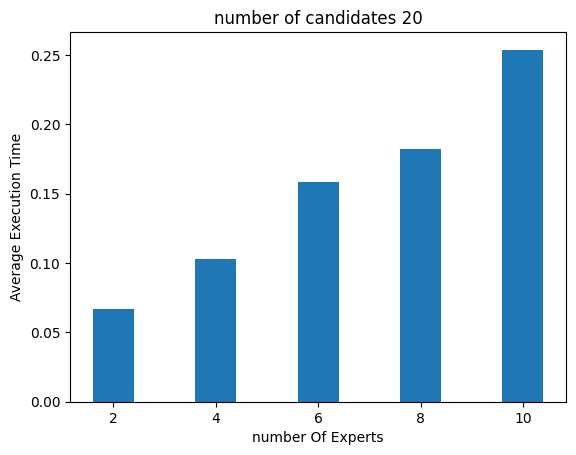

[0.06651458 0.10273762 0.15835536 0.1823069  0.2537097 ]


In [13]:
time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts")

In [14]:
F1Time = []
F1Time = time

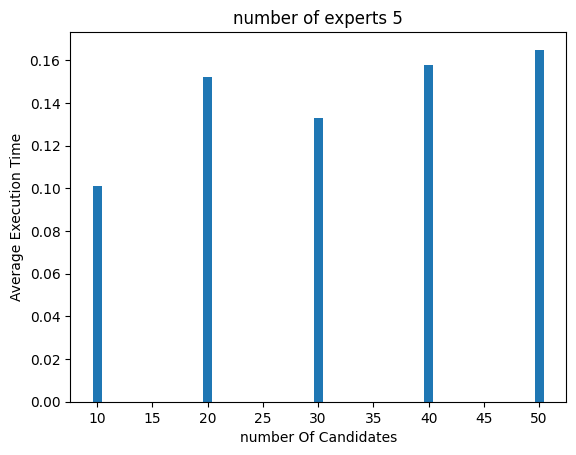

[0.10125615 0.15195854 0.13290422 0.15790004 0.16488703]


In [15]:
time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates")
F1TimeCandidateVariable = []
F1TimeCandidateVariable = time

In [16]:
%store -r F2Time
%store -r F3Time
%store -r F4Time
%store -r F2TimeCandidateVariable
%store -r F3TimeCandidateVariable
%store -r F4TimeCandidateVariable

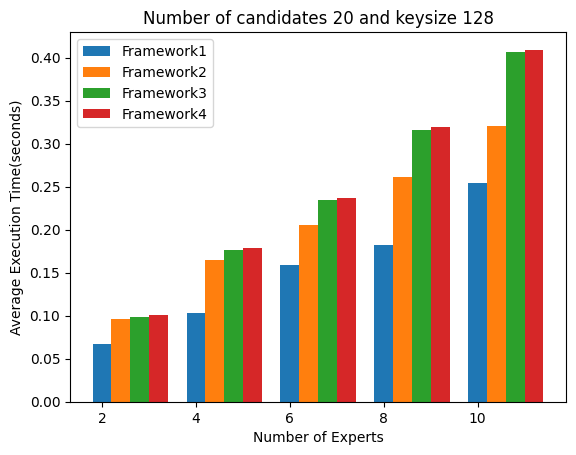

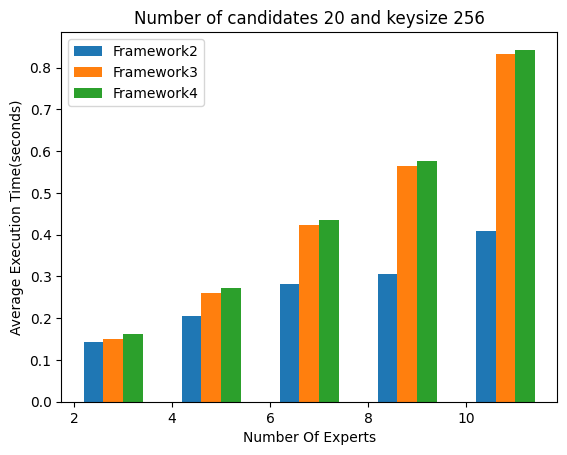

KeyboardInterrupt: 

In [35]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1Time, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize 128"  ) 
        plt.legend() 
        plt.show()
        
    else:
        
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

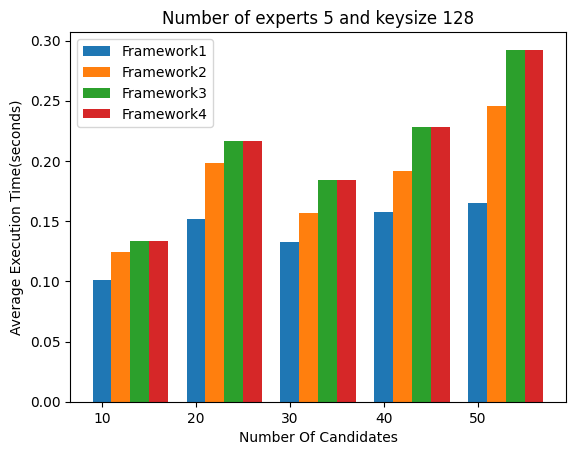

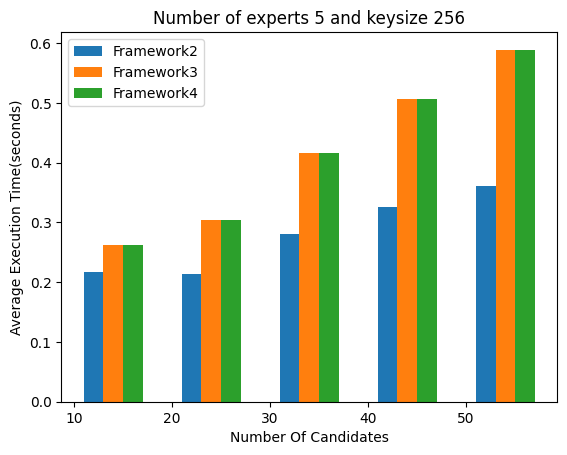

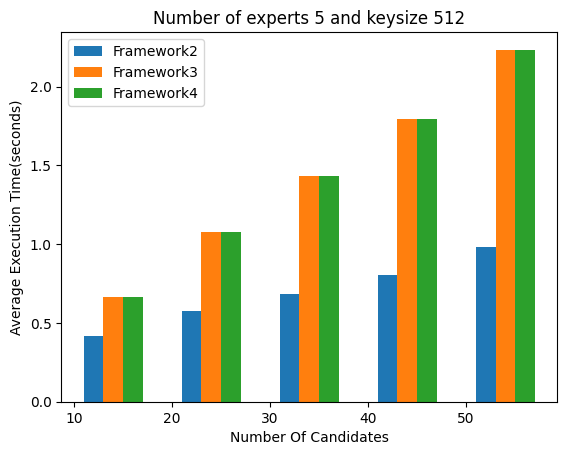

In [29]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1TimeCandidateVariable, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of experts 5 and keysize 128"  ) 
        plt.legend() 
        plt.show()
    else:
        
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Candidates") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of experts 5 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

In [24]:
print(F1Time)
print(F2Time)
print(F3Time)
print(F4Time)

[0.06651458 0.10273762 0.15835536 0.1823069  0.2537097 ]
[array([0.0965265 , 0.16511253, 0.20574734, 0.26146954, 0.3200232 ],
      dtype=float32), array([0.14401416, 0.20530999, 0.281083  , 0.3053704 , 0.40761966],
      dtype=float32), array([0.42673415, 0.47392964, 0.56684697, 0.6547189 , 0.71946985],
      dtype=float32)]
[array([0.09792051, 0.17658664, 0.23460522, 0.3157177 , 0.4061231 ],
      dtype=float32), array([0.15012065, 0.26052624, 0.4233504 , 0.56510913, 0.8313775 ],
      dtype=float32), array([0.4603344 , 0.77949226, 1.344991  , 2.1127088 , 3.0738082 ],
      dtype=float32)]
[array([0.10032387, 0.17915662, 0.23721242, 0.31876475, 0.40910426],
      dtype=float32), array([0.16101876, 0.27182025, 0.43396354, 0.5762123 , 0.8425816 ],
      dtype=float32), array([0.5205252 , 0.83956593, 1.4054173 , 2.1723974 , 3.1355555 ],
      dtype=float32)]


In [33]:
print(F1TimeCandidateVariable)
print(F2TimeCandidateVariable)
print(F3TimeCandidateVariable)
print(F4TimeCandidateVariable)

[0.10125615 0.15195854 0.13290422 0.15790004 0.16488703]
[array([0.12468785, 0.19816919, 0.15674439, 0.19152433, 0.2456624 ],
      dtype=float32), array([0.21690902, 0.2133228 , 0.28087735, 0.32565117, 0.36088604],
      dtype=float32), array([0.41730493, 0.5748943 , 0.6820431 , 0.80195934, 0.9835636 ],
      dtype=float32)]
[array([0.1337476 , 0.21639264, 0.18441203, 0.22812894, 0.2923838 ],
      dtype=float32), array([0.26244548, 0.30417186, 0.4167359 , 0.5065913 , 0.58888954],
      dtype=float32), array([0.6666473, 1.078968 , 1.4356155, 1.7925037, 2.234229 ],
      dtype=float32)]
[array([0.1337476 , 0.21639264, 0.18441203, 0.22812894, 0.2923838 ],
      dtype=float32), array([0.26244548, 0.30417186, 0.4167359 , 0.5065913 , 0.58888954],
      dtype=float32), array([0.6666473, 1.078968 , 1.4356155, 1.7925037, 2.234229 ],
      dtype=float32)]
